# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [4]:
# Example JSON to know what is inside eache JSON for each city
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "bethel"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
post_response2 = requests.get(query_url)
post_response2.json()

{'coord': {'lon': -73.41, 'lat': 41.37},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 266.99,
  'feels_like': 261.43,
  'temp_min': 264.82,
  'temp_max': 269.26,
  'pressure': 1017,
  'humidity': 48},
 'visibility': 16093,
 'wind': {'speed': 3.1, 'deg': 300},
 'clouds': {'all': 1},
 'dt': 1583045548,
 'sys': {'type': 1,
  'id': 3888,
  'country': 'US',
  'sunrise': 1583062055,
  'sunset': 1583102670},
 'timezone': -18000,
 'id': 5282297,
 'name': 'Bethel',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
response_json = []
url = "http://api.openweathermap.org/data/2.5/weather?"

# Make a request for each of the indices
for x in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + x
    post_response = requests.get(query_url)
    response = post_response.json()
    test =response['cod']
    
    if test == 200: 
        print(f"Making request number: {cities.index(x)+1} for city: {x}")
        response_json.append(response)
    else:
        print('City not found')
    

Making request number: 1 for city: hermanus
Making request number: 2 for city: codrington
Making request number: 3 for city: moron
Making request number: 4 for city: klichka
Making request number: 5 for city: georgetown
Making request number: 6 for city: bluff
Making request number: 7 for city: hobart
Making request number: 8 for city: tromso
Making request number: 9 for city: cabo san lucas
Making request number: 10 for city: vaini
Making request number: 11 for city: butaritari
Making request number: 12 for city: aksarka
Making request number: 13 for city: benguela
Making request number: 14 for city: rikitea
Making request number: 15 for city: champerico
Making request number: 16 for city: busselton
Making request number: 17 for city: hasaki
Making request number: 18 for city: hilo
City not found
Making request number: 20 for city: saint george
Making request number: 21 for city: sabang
Making request number: 22 for city: timbiras
Making request number: 23 for city: te anau
Making req

Making request number: 193 for city: hamilton
City not found
Making request number: 195 for city: ronne
City not found
Making request number: 197 for city: ilhabela
Making request number: 198 for city: sechura
Making request number: 199 for city: cherskiy
Making request number: 200 for city: tres pontas
Making request number: 201 for city: luderitz
Making request number: 202 for city: geraldton
Making request number: 203 for city: banda aceh
City not found
Making request number: 205 for city: souillac
Making request number: 206 for city: roma
Making request number: 207 for city: kabanjahe
City not found
Making request number: 209 for city: santa cruz de la palma
Making request number: 210 for city: marsa matruh
City not found
Making request number: 212 for city: porto walter
Making request number: 213 for city: jaru
Making request number: 214 for city: carballo
City not found
Making request number: 216 for city: saskylakh
Making request number: 217 for city: sola
Making request number:

Making request number: 382 for city: kasongo-lunda
Making request number: 383 for city: mahebourg
Making request number: 384 for city: pringsewu
Making request number: 385 for city: olafsvik
Making request number: 386 for city: ilulissat
Making request number: 387 for city: saquarema
Making request number: 388 for city: shahrud
Making request number: 389 for city: touros
Making request number: 390 for city: xinpu
Making request number: 391 for city: belozerskoye
Making request number: 392 for city: padilla
Making request number: 393 for city: lhokseumawe
Making request number: 394 for city: valday
Making request number: 395 for city: petropavlovka
Making request number: 396 for city: kota bahru
Making request number: 397 for city: chastyye
Making request number: 398 for city: evensk
Making request number: 399 for city: moen
Making request number: 400 for city: kulhudhuffushi
Making request number: 401 for city: bikaner
Making request number: 402 for city: jalu
Making request number: 40

Making request number: 569 for city: saint anthony
Making request number: 570 for city: altay
Making request number: 571 for city: kunjah
Making request number: 572 for city: nizwa
Making request number: 573 for city: byron bay
Making request number: 574 for city: monsenhor gil
Making request number: 575 for city: awjilah
Making request number: 576 for city: san pedro
Making request number: 577 for city: prieska
Making request number: 578 for city: tuatapere
City not found
Making request number: 580 for city: takoradi
Making request number: 581 for city: dingle
Making request number: 582 for city: jamame
Making request number: 583 for city: biak
Making request number: 584 for city: sao filipe
Making request number: 585 for city: vardo
Making request number: 586 for city: elizabeth city
Making request number: 587 for city: aden
Making request number: 588 for city: osa
Making request number: 589 for city: ostrovnoy


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

{'coord': {'lon': -7.72, 'lat': 4.38},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 298.56,
  'feels_like': 303.5,
  'temp_min': 298.56,
  'temp_max': 298.56,
  'pressure': 1009,
  'humidity': 94,
  'sea_level': 1009,
  'grnd_level': 1006},
 'wind': {'speed': 1.57, 'deg': 268},
 'clouds': {'all': 47},
 'dt': 1583042071,
 'sys': {'country': 'LR', 'sunrise': 1583044935, 'sunset': 1583088264},
 'timezone': 0,
 'id': 2276492,
 'name': 'Harper',
 'cod': 200}

In [26]:
# set up lists to hold reponse info
Lat = []
Temp = []
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]
# Loop through the list of cities and perform a request for data on each
for x in response_json:
    
    Lat.append(x['coord']['lat'])
    Temp.append(x['main']['temp'])
    City.append(x['name'])
    Cloudiness.append(x['clouds']['all'])
    Country.append(x['sys']['country'])
    Date.append(x['dt'])
    Humidity.append(x['main']['humidity'])
    Lng.append(x['coord']['lon'])
    Max_Temp.append(x['main']['temp_max'])
    Wind_Speed.append(x['wind']['speed'])


In [27]:
weather_data = pd.DataFrame({
    'City': City,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date':Date,
    'Humidity': Humidity,
    'Lat':Lat,
    'Lng':Lng,
    'Max Temp':Max_Temp,
    'Wind Speed':Wind_Speed
})
weather_data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,2,ZA,1583046676,77,-34.42,19.23,297.04,4.92
1,Codrington,100,AU,1583046800,82,-38.27,141.97,290.18,10.17
2,Morón,0,AR,1583046771,83,-34.65,-58.62,299.15,2.60
3,Klichka,76,RU,1583046771,86,50.45,118.00,263.56,2.34
4,George Town,20,MY,1583046771,59,5.41,100.34,306.15,4.10
...,...,...,...,...,...,...,...,...,...
536,Vardø,80,NO,1583046932,93,70.37,31.11,269.85,5.62
537,Elizabeth City,1,US,1583046634,54,36.29,-76.25,276.15,4.76
538,Aden,1,YE,1583046933,58,12.78,45.04,299.81,3.25
539,Osa,96,RU,1583046933,81,57.28,55.46,271.03,5.43


In [32]:
weather_data.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [34]:
weather_data.to_csv((r'weather_data.csv'))

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

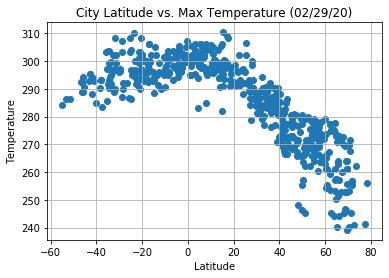

In [40]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (02/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()
plt.show()

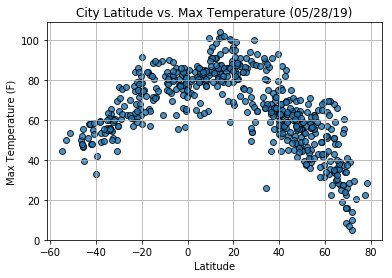

#### Latitude vs. Humidity Plot

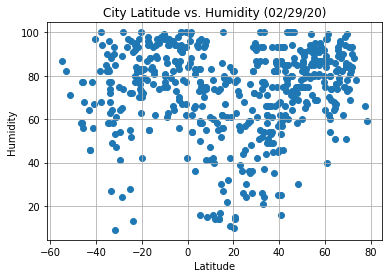

In [41]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (02/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

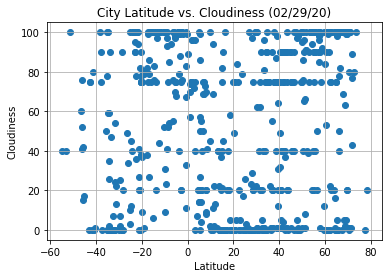

In [42]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (02/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show()

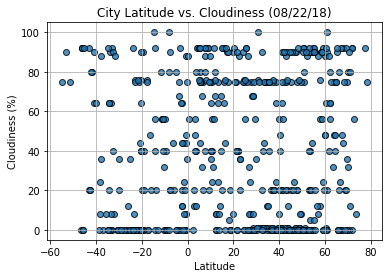

#### Latitude vs. Wind Speed Plot

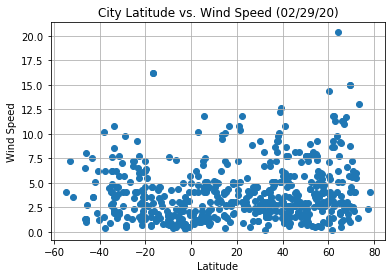

In [43]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (02/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

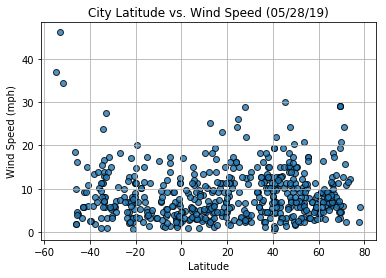

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


def CreateLinearRegression(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


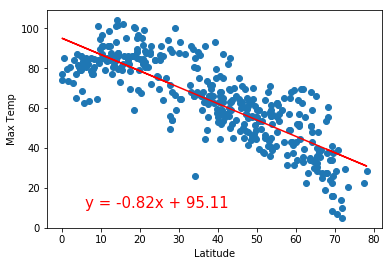

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


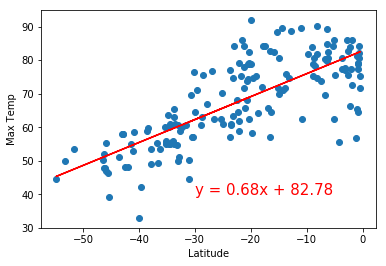

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


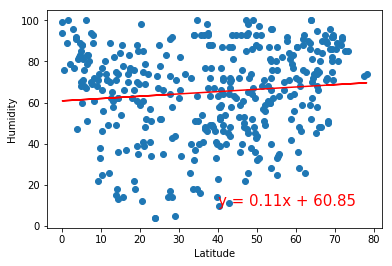

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


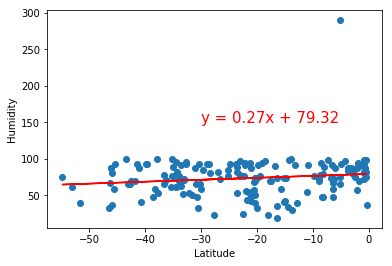

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


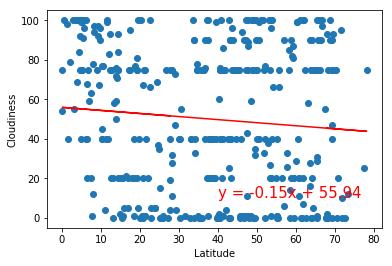

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


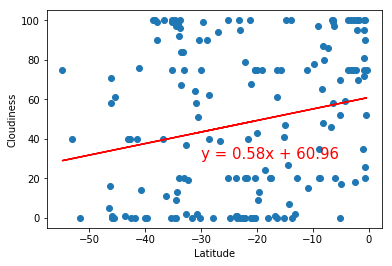

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


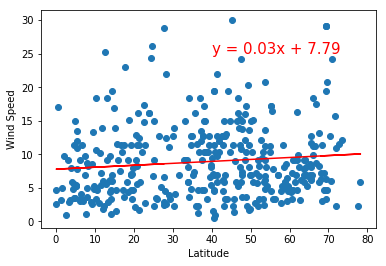

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


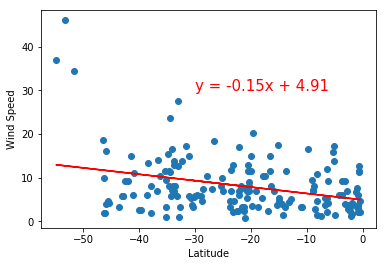